In [8]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix


## DATAset
#https://drive.google.com/file/d/1RjyrKHTOXgfztLP5JGAMoRehn69LYuZb/view?usp=sharing

## !! Update this to YOUR path
DF1 = pd.read_csv("/Users/yaminipriyankakandikattu/Downloads/StudentSummerProgramData_Numeric_2NumLabeled_3Cols.csv")
print(DF1)



    Decision   GPA  WorkExp  TestScore
0          0  3.90      6.7        962
1          0  3.80      1.4        969
2          0  3.80      2.3        970
3          0  3.60      0.9        969
4          0  3.92      1.2        969
..       ...   ...      ...        ...
58         1  3.33      0.8        768
59         1  2.91      6.2        753
60         1  3.56      1.7        769
61         1  2.85      4.6        762
62         1  3.21      1.7        766

[63 rows x 4 columns]


In [ ]:
print(DF)

In [10]:
## Set y to the label. Check the shape!
y = np.array(DF1.iloc[:,0]).T
y = np.array([y]).T
print("y is\n", y)

y is
 [[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


In [12]:
## Normalize the data (not the label!)
## or min/max
#normalized_df=(DF1-DF1.min())/(DF1.max()-DF1.min())


In [13]:
DF=DF.iloc[:, [1, 2, 3]]
DF=(DF-DF.mean())/DF.std()
print(DF)
X = np.array(DF)
print("X is\n", X)

InputColumns = 3
NumberOfLabels = 2
n = len(DF) ## number of rows of entire X
## Take the label off of X and make it a numpy array

LR=.01
LRB = .01
#................................................

         GPA   WorkExp  TestScore
0   0.106789  2.097127  -1.647459
1  -0.312219 -0.441100   0.437562
2  -0.325036 -0.015123   0.283706
3  -0.965448 -0.678379   0.560578
4   0.079725 -0.536012   0.418553
..       ...       ...        ...
58  0.999219 -0.626476   0.256847
59 -0.493117  2.680658  -2.506043
60  1.927936 -0.088919  -0.025482
61 -0.886586  1.670456  -1.085832
62  0.539215 -0.084936   0.142220

[63 rows x 3 columns]
X is
 [[ 0.10678909  2.097127   -1.64745864]
 [-0.31221919 -0.44109972  0.4375619 ]
 [-0.32503643 -0.01512309  0.28370581]
 [-0.965448   -0.67837901  0.56057848]
 [ 0.07972521 -0.5360118   0.41855285]
 [-0.28654574 -0.53483373  0.45880886]
 [-0.0247168  -0.39217185  0.39190774]
 [-0.63883365 -0.53601129  0.49696528]
 [ 0.12029814  1.14348929 -0.56917162]
 [-0.60130644 -0.43903619  0.46808887]
 [-0.29940362 -0.29789879  0.39238621]
 [ 0.11239239 -0.72583552  0.45230048]
 [-0.94113292 -0.53483327  0.52832156]
 [-0.64662532  0.41624255  0.08418992]
 [-0.63891249  0.

In [ ]:
###################### Creating one hot labels for y ------------------
# temp = y
# #print(temp)
# one_hot_labels = np.zeros((n, NumberOfLabels))
# print(one_hot_labels)
# for i in range(n):
#     one_hot_labels[i, temp[i]-1] = 1    
# #print(one_hot_labels)
# y = one_hot_labels
# print(y)
##################------------------------------------
  

In [37]:
class NeuralNetwork(object):
    def __init__(self):
        
        self.InputNumColumns = InputColumns  ## columns
        self.OutputSize = 1 ## Categories
        self.HiddenUnits = 4  ## one layer with h units
        self.n = n  ## number of training examples, n
        
        print("Initialize NN\n")
        #Random W1
        self.W1 = np.random.randn(self.InputNumColumns, self.HiddenUnits) # c by h  
       
        print("INIT W1 is\n", self.W1)
         ##-----------------------------------------
        ## NOTE ##
        ##
        ## The following are all random. However, you can comment this out
        ## and can set any weights and biases by hand , etc.
        ##
        ##---------------------------------------------
        
        self.W2 = np.random.randn(self.HiddenUnits, self.OutputSize) # h by o 
        print("W2 is:\n", self.W2)
        
        self.b = np.random.randn(1, self.HiddenUnits)
        print("The b's are:\n", self.b)
        ## biases for layer 1
        
        self.c = np.random.randn(1, self.OutputSize)
        print("The c is\n", self.c)
        ## bias for last layer
    def FeedForward(self, X):
        print("FeedForward\n\n")
        self.z = (np.dot(X, self.W1)) + self.b 
        #X is n by c   W1  is c by h -->  n by h
        print("Z1 is:\n", self.z)
        
        self.h = self.Sigmoid(self.z) #activation function    shape: n by h
        print("H is:\n", self.h)
        
        self.z2 = (np.dot(self.h, self.W2)) + self.c # n by h  @  h by o  -->  n by o  
        print("Z2 is:\n", self.z2)
        
        ## Using Softmax for the output activation
        output = self.Sigmoid(self.z2)  
        print("output Y^ is:\n", output)
        return output
    def Sigmoid(self, s, deriv=False):
        if (deriv == True):
            return s * (1 - s)
        return 1/(1 + np.exp(-s))
    
    # def Softmax(self, M):
    #     #print("M is\n", M)
    #     expM = np.exp(M)
    #     #print("expM is\n", expM)
    #     SM=expM/np.sum(expM, axis=1)[:,None]
    #     #print("SM is\n",SM )
    #     return SM 
    def BackProp(self, X, y, output):
        print("\n\nBackProp\n")
        self.LR = LR
        self.LRB=LRB  ## LR for biases
        
        # Y^ - Y
        self.output_error = output - y    
        print("Y^ - Y\n", self.output_error)
        self.output_delta = self.output_error 
        self.D_Error_W2 = self.output_delta.dot(self.W2.T) #  D_Error times W2
        self.H_D_Error_W2 = self.D_Error_W2 * self.Sigmoid(self.h, deriv=True) 
        ################------UPDATE weights and biases ------------------
        #print("Old W1: \n", self.W1)
        #print("Old W2 is:\n", self.W2)
        #print("X transpose is\n", X.T)
        
        ##  XT  (H)(1 - H) (Y^ - Y)(Y^)(1-Y^)(W2)
        self.X_H_D_Error_W2 = X.T.dot(self.H_D_Error_W2) ## this is dW1
        
        ## (H)T (Y^ - Y) - 
        self.h_output_delta = self.h.T.dot(self.output_delta) ## this is for dW2
        
        #print("the gradient :\n", self.X_H_D_Error_W2)
        #print("the gradient average:\n", self.X_H_D_Error_W2/self.n)
        
        print("Using sum gradient........\n")
        self.W1 = self.W1 - self.LR*(self.X_H_D_Error_W2) # c by h  adjusting first set (input -> hidden) weights
        self.W2 = self.W2 - self.LR*(self.h_output_delta) 
        print("The sum of the b update is\n", np.mean(self.H_D_Error_W2, axis=0))
        print("The b biases before the update are:\n", self.b)
        self.b = self.b  - self.LRB*np.mean(self.H_D_Error_W2, axis=0)
        #print("The H_D_Error_W2 is...\n", self.H_D_Error_W2)
        print("Updated bs are:\n", self.b)
        
        self.c = self.c - self.LR*np.mean(self.output_delta, axis=0)
        #print("Updated c's are:\n", self.c)
        
        print("The W1 is: \n", self.W1)
        print("The W1 gradient is: \n", self.X_H_D_Error_W2)
        #print("The W1 gradient average is: \n", self.X_H_D_Error_W2/self.n)
        print("The W2 gradient  is: \n", self.h_output_delta)
        #print("The W2 gradient average is: \n", self.h_output_delta/self.n)
        print("The biases b gradient is:\n",np.mean(self.H_D_Error_W2, axis=0 ))
        print("The bias c gradient is: \n", np.mean(self.output_delta, axis=0))
        ###############################################################
    def TrainNetwork(self, X, y):
        output = self.FeedForward(X)
        print("Output in TNN\n", output)
        self.BackProp(X, y, output)
        return output

In [39]:
#-------------------------------------------------------------------        
MyNN = NeuralNetwork()

TotalLoss=[]
AvgLoss=[]
Epochs=500

for i in range(Epochs): 
    print("\nRUN:\n ", i)
    output=MyNN.TrainNetwork(X, y)
   
    #print("The y is ...\n", y)
    print("The output is: \n", output)
    output=np.where(output > 0.5, 1, 0)
    print('Prediction y^ is', output)
    ## Using Categorical Cross Entropy...........
    #loss = np.mean(-y * np.log(output))  ## We need y to place the "1" in the right place
    loss=np.sum(np.square(output-y))
    avgLoss=np.mean(np.square(output-y))
    print("The current average loss is\n", loss)
    TotalLoss.append(loss)
    AvgLoss.append(avgLoss)

Initialize NN

INIT W1 is
 [[ 1.59646583  1.67952786 -0.17062442  1.34981247]
 [-0.97130869 -0.1100516   0.57723626  0.61214002]
 [ 0.23074482 -0.48881736 -0.06456135  0.76118829]]
W2 is:
 [[ 0.91648288]
 [-1.05006219]
 [ 0.87634383]
 [-0.29148507]]
The b's are:
 [[-0.91051531  2.14772751  1.13030691  0.00800817]]
The c is
 [[-0.45282083]]

RUN:
  0
FeedForward


Z1 is:
 [[-3.15713041  2.90159696  2.42898598  0.18186256]
 [-0.87955343  1.45800256  0.90071079 -0.35037698]
 [-1.34927202  1.46480376  1.15872003 -0.22403397]
 [-1.66355404  0.32686691  0.86725925 -1.28372274]
 [-0.16602492  2.13602128  0.78027606  0.1061055 ]
 [-0.74261937  1.50105154  0.84085187 -0.35692804]
 [-0.47862423  1.95780279  0.88284629  0.03289661]
 [-1.29508682  0.89085224  0.89781763 -0.80412727]
 [-1.96047794  2.50214973  1.80659108  0.43711688]
 [-1.33603174  0.95732326  0.94925642 -0.71609062]
 [-1.00861018  1.48584985  0.98410151 -0.27980655]
 [ 0.07829165  2.19528071  0.66295032  0.05968968]
 [-1.77160618 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
 ## OLD---------------------
    # OLD #print("Total Loss:", .5*(np.sum(np.square(output-y))))
    # OLD #TotalLoss.append( .5*(np.sum(np.square(output-y))))
    #print("Average Loss:", .5*(np.mean(np.square((output-y)))))
    #AvgLoss.append(.5*(np.mean(np.square((output-y)))))

[[33  6]
 [ 2 22]]


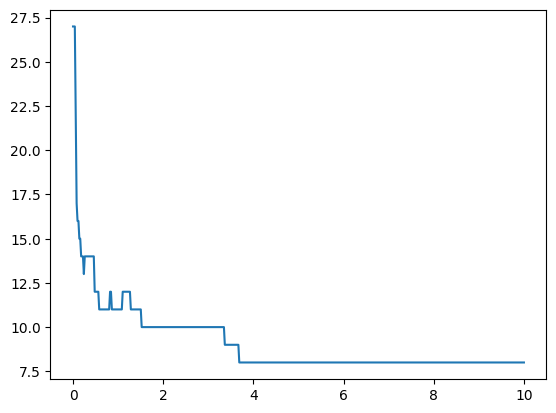

In [40]:
###################-output and vis----------------------    
#print("Total Loss List:", TotalLoss) 
import matplotlib.pyplot as plt

fig1 = plt.figure()
ax = plt.axes()
x = np.linspace(0, 10, Epochs)
ax.plot(x, TotalLoss)    

print(confusion_matrix(output, y))

# AvgLoss_ = np.mean(AvgLoss)
# print(AvgLoss_)
# fig2 = plt.figure()
# ax = plt.axes()
# x = np.linspace(0, 10, Epochs)
# ax.plot(x, AvgLoss_)  

#print(y)


In [41]:
cm = confusion_matrix(output, y)
cm

array([[33,  6],
       [ 2, 22]])

In [43]:
import seaborn as sns

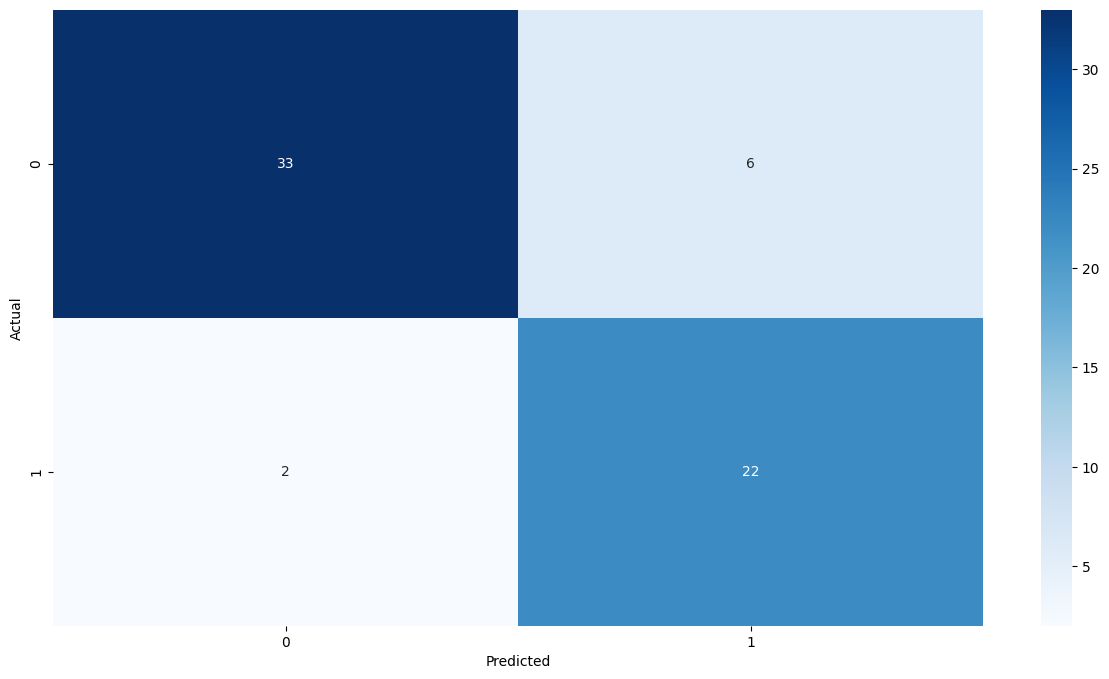

In [46]:
plt.figure(figsize = (15,8))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()